In [9]:
from pathlib import Path

PROJECT_DIR = Path("/mnt/data/syracuse_unfit_properties_project")
RAW_DIR = PROJECT_DIR / "data_raw"
PROCESSED_DIR = PROJECT_DIR / "data_processed"
OUTPUT_DIR = PROJECT_DIR / "outputs"
DOCS_DIR = PROJECT_DIR / "docs"

for p in [RAW_DIR, PROCESSED_DIR, OUTPUT_DIR, DOCS_DIR]:
    p.mkdir(parents=True, exist_ok=True)

PROJECT_DIR


WindowsPath('/mnt/data/syracuse_unfit_properties_project')

In [10]:
import shutil
import json
from datetime import datetime

source_file = Path("Unfit_Properties.csv")
raw_file = RAW_DIR / "Unfit_Properties_raw.csv"

# Keep raw copy exactly as received
shutil.copy2(source_file, raw_file)

metadata = {
    "dataset_name": "Unfit Properties (Syracuse Open Data)",
    "acquisition_date_local": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "source_file_original": str(source_file),
    "stored_raw_file": str(raw_file),
    "api_or_download_endpoint": "TBD (paste data.syr.gov dataset link here)",
    "notes": "Raw file copied exactly as received. Processed versions will be saved separately."
}

meta_path = DOCS_DIR / "acquisition_metadata.json"
meta_path.write_text(json.dumps(metadata, indent=2))

meta_path


WindowsPath('/mnt/data/syracuse_unfit_properties_project/docs/acquisition_metadata.json')

In [11]:
import pandas as pd

df_raw = pd.read_csv(raw_file)

print("Shape:", df_raw.shape)
print("\nColumns:")
print(df_raw.columns.tolist())

df_raw.head(5)


c:\Users\abhis\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Shape: (264, 29)

Columns:
['X', 'Y', 'complaint_number', 'address', 'area_involved', 'zip', 'SBL', 'parcel_id', 'violation', 'violation_date', 'comply_by_date', 'status_type_name', 'department_name', 'status_date', 'complaint_type_name', 'comp_status', 'comp_open_date', 'comp_close_date', 'Vacant', 'article', 'corrective_action', 'owner_name', 'owner_address', 'owner_city', 'owner_state', 'owner_zip_code', 'Latitude', 'Longitude', 'ObjectId']


,X,Y,complaint_number,address,area_involved,zip,SBL,parcel_id,violation,violation_date,...,article,corrective_action,owner_name,owner_address,owner_city,owner_state,owner_zip_code,Latitude,Longitude,ObjectId
0,-8.478471e+06,5.315062e+06,2025-08167,317 Hillview Ave,Premises,13207,079.-10-12.0,29733,2020 PMCNYS - Section 107.1.3 - Structure Unfi...,2025/09/11 14:25:12.040+00,...,A structure is unfit for human occupancy whene...,Supply power to building in order to remove un...,Robert Steingraber,317 Hillview Ave,Syracuse,NY,13207,43.0203,-76.1634,1
1,-8.477347e+06,5.316966e+06,2025-08102,342-44 Cortland Ave,Home and property,13205,085.-14-03.0,32251,2020 PMCNYS - Section 107.1.3 - Structure Unfi...,2025/09/10 15:12:41.577+00,...,A structure is unfit for human occupancy whene...,Remove unfit violation,Jason Semple,203 Lexington Ave,Syracuse,NY,13210,43.0328,-76.1533,2
2,-8.479874e+06,5.319007e+06,2024-06963,135 Nelson St,BASEMENT,13204,099.-02-31.0,37314,2020 PMCNYS - Section 107.1.3 - Structure Unfi...,2025/09/10 14:45:48.927+00,...,A structure is unfit for human occupancy whene...,REPAIR SEWAGE BACKUP / PLUMBING ISSUE INTO THE...,Rose Longobardo,1323 Butternut St,Syracuse,NY,13208,43.0462,-76.1760,3
3,-8.477180e+06,5.319311e+06,2025-08100,317-19 Salina St S To Bank Alley,Premises,13202,101.-06-10.0,37858,2020 PMCNYS - Section 107.1.3 - Structure Unfi...,2025/09/10 14:09:09+00,...,A structure is unfit for human occupancy whene...,The structure is unfit due to being unlawful a...,Tal-Am Realty LLC,952 Troy Schenectady Rd,Latham,NY,12110,43.0482,-76.1518,4
4,-8.476645e+06,5.315108e+06,V2025-0844,216 Brighton Ave W,HOME AND PROPERTY,13205,077.-21-22.0,28863,2020 PMCNYS - Section 107.1.3 - Structure Unfi...,2025/09/09 16:02:37.083+00,...,A structure is unfit for human occupancy whene...,REMOVE UNFIT VIOLATION,Robert Carman,512 Summit Ave,Syracuse,NY,13207,43.0206,-76.1470,5


In [12]:
def sample_values(s, n=5):
    s = s.dropna()
    if len(s) == 0:
        return []
    return s.astype(str).unique()[:n].tolist()

data_dict = pd.DataFrame({
    "column": df_raw.columns,
    "dtype": [str(df_raw[c].dtype) for c in df_raw.columns],
    "missing_count": [int(df_raw[c].isna().sum()) for c in df_raw.columns],
    "missing_pct": [round(float(df_raw[c].isna().mean() * 100), 2) for c in df_raw.columns],
    "example_values": [sample_values(df_raw[c]) for c in df_raw.columns],
    "description": ["TODO - add meaning of this field"] * len(df_raw.columns)
}).sort_values("missing_pct", ascending=False)

dict_path = DOCS_DIR / "data_dictionary.csv"
data_dict.to_csv(dict_path, index=False)

dict_path


WindowsPath('/mnt/data/syracuse_unfit_properties_project/docs/data_dictionary.csv')

Missing values: frequency, patterns, impact

In [13]:
missing_summary = (
    df_raw.isna()
    .sum()
    .to_frame(name="missing_count")
    .assign(
        missing_pct=lambda x: (x["missing_count"] / len(df_raw) * 100).round(2)
    )
    .sort_values("missing_pct", ascending=False)
)

missing_summary


,missing_count,missing_pct
Vacant,264,100.00
area_involved,8,3.03
corrective_action,5,1.89
owner_zip_code,1,0.38
owner_city,1,0.38
owner_address,1,0.38
X,0,0.00
comp_status,0,0.00
Longitude,0,0.00
Latitude,0,0.00


In [14]:
missing_path = OUTPUT_DIR / "missing_values_summary.csv"
missing_summary.to_csv(missing_path)
missing_path


WindowsPath('/mnt/data/syracuse_unfit_properties_project/outputs/missing_values_summary.csv')

In [15]:
text_cols = df_raw.select_dtypes(include="object").columns.tolist()

inconsistency_report = []

for col in text_cols:
    s = df_raw[col].dropna().astype(str)
    if s.empty:
        continue
    inconsistency_report.append({
        "column": col,
        "unique_original": s.nunique(),
        "unique_lowercase": s.str.lower().nunique(),
        "pct_with_whitespace": round((s != s.str.strip()).mean() * 100, 2)
    })

inconsistencies = pd.DataFrame(inconsistency_report).sort_values(
    ["pct_with_whitespace", "unique_original"],
    ascending=False
)

inconsistencies


,column,unique_original,unique_lowercase,pct_with_whitespace
17,owner_address,249,248,75.29
15,corrective_action,220,216,30.89
2,area_involved,96,88,18.36
19,owner_state,15,15,1.14
18,owner_city,71,71,0.76
14,article,6,6,0.38
0,complaint_number,264,264,0.00
1,address,264,264,0.00
3,SBL,264,264,0.00
5,violation_date,264,264,0.00


In [16]:
inc_path = OUTPUT_DIR / "text_inconsistencies.csv"
inconsistencies.to_csv(inc_path, index=False)
inc_path


WindowsPath('/mnt/data/syracuse_unfit_properties_project/outputs/text_inconsistencies.csv')

In [17]:
date_cols = [c for c in df_raw.columns if any(k in c.lower() for k in ["date", "year", "time"])]

date_cols


['violation_date',
 'comply_by_date',
 'status_date',
 'comp_open_date',
 'comp_close_date']

In [18]:
temporal_coverage = []

for col in date_cols:
    parsed = pd.to_datetime(df_raw[col], errors="coerce")
    temporal_coverage.append({
        "column": col,
        "non_null": int(parsed.notna().sum()),
        "min_date": parsed.min(),
        "max_date": parsed.max(),
        "pct_parseable": round(parsed.notna().mean() * 100, 2)
    })

temporal_df = pd.DataFrame(temporal_coverage)
temporal_df


,column,non_null,min_date,max_date,pct_parseable
0,violation_date,239,2014-01-27 18:07:23.207000+00:00,2025-09-11 14:25:12.040000+00:00,90.53
1,comply_by_date,258,1900-01-01 00:00:00+00:00,2025-10-01 15:21:42+00:00,97.73
2,status_date,158,2014-01-27 18:07:23.207000+00:00,2025-09-11 14:25:12.043000+00:00,59.85
3,comp_open_date,243,2014-01-27 08:58:20.737000+00:00,2025-09-11 14:23:10.597000+00:00,92.05
4,comp_close_date,264,1900-01-01 00:00:00+00:00,2021-04-22 11:46:27+00:00,100.00


In [19]:
temporal_path = OUTPUT_DIR / "temporal_coverage.csv"
temporal_df.to_csv(temporal_path, index=False)
temporal_path


WindowsPath('/mnt/data/syracuse_unfit_properties_project/outputs/temporal_coverage.csv')

In [20]:
geo_cols = [c for c in df_raw.columns if any(k in c.lower() for k in [
    "lat", "lon", "longitude", "latitude",
    "address", "zip", "neighborhood", "district", "tract"
])]

geo_cols


['address',
 'zip',
 'violation',
 'violation_date',
 'owner_address',
 'owner_zip_code',
 'Latitude',
 'Longitude']

In [21]:
lat_cols = [c for c in df_raw.columns if "lat" in c.lower()]
lon_cols = [c for c in df_raw.columns if any(k in c.lower() for k in ["lon", "lng", "longitude"])]

if lat_cols and lon_cols:
    lat = pd.to_numeric(df_raw[lat_cols[0]], errors="coerce")
    lon = pd.to_numeric(df_raw[lon_cols[0]], errors="coerce")

    print("Geo-complete rows (%):", round(((lat.notna() & lon.notna()).mean() * 100), 2))
    print("Latitude range:", lat.min(), "to", lat.max())
    print("Longitude range:", lon.min(), "to", lon.max())
else:
    print("No latitude/longitude columns found.")


Geo-complete rows (%): 0.0
Latitude range: nan to nan
Longitude range: -76.1973 to -76.0888


In [22]:
df_clean = df_raw.copy()

# Trim whitespace in text columns
for col in text_cols:
    df_clean[col] = df_clean[col].astype("string").str.strip()

clean_path = PROCESSED_DIR / "Unfit_Properties_clean.csv"
df_clean.to_csv(clean_path, index=False)

clean_path


WindowsPath('/mnt/data/syracuse_unfit_properties_project/data_processed/Unfit_Properties_clean.csv')

In [23]:
import numpy as np

numeric_summary = df_clean.describe(include=[np.number]).T
numeric_summary


,count,mean,std,min,25%,50%,75%,max
X,264.0,-8.477365e+06,2104.187544,-8.482245e+06,-8.478585e+06,-8.477374e+06,-8.476320e+06,-8.470166e+06
Y,264.0,5.318668e+06,3051.942485,5.310039e+06,5.316577e+06,5.318885e+06,5.321341e+06,5.324279e+06
zip,264.0,1.320582e+04,3.249611,1.320200e+04,1.320400e+04,1.320500e+04,1.320800e+04,1.322400e+04
parcel_id,264.0,2.292677e+04,14309.012768,5.300000e+01,7.854250e+03,2.818600e+04,3.488125e+04,7.121900e+04
Vacant,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,264.0,4.304398e+01,0.020037,4.298730e+01,4.303025e+01,4.304540e+01,4.306153e+01,4.308080e+01
Longitude,264.0,-7.615347e+01,0.018902,-7.619730e+01,-7.616442e+01,-7.615355e+01,-7.614408e+01,-7.608880e+01
ObjectId,264.0,1.325000e+02,76.354437,1.000000e+00,6.675000e+01,1.325000e+02,1.982500e+02,2.640000e+02


In [24]:
full_summary = df_clean.describe(include="all").T
full_summary


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X,264.0,NaN,NaN,NaN,-8477365.173642,2104.187544,-8482244.635822,-8478585.007562,-8477374.4081,-8476319.655925,-8470166.471071
Y,264.0,NaN,NaN,NaN,5318668.357031,3051.942485,5310038.977185,5316577.339504,5318884.744955,5321341.272911,5324278.52869
complaint_number,264,264,2025-08167,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,264,264,317 Hillview Ave,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
area_involved,256,91,Premises,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,264.0,NaN,NaN,NaN,13205.818182,3.249611,13202.0,13204.0,13205.0,13208.0,13224.0
SBL,264,264,079.-10-12.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parcel_id,264.0,NaN,NaN,NaN,22926.768939,14309.012768,53.0,7854.25,28186.0,34881.25,71219.0
violation,264,5,2020 PMCNYS - Section 107.1.3 - Structure Unfi...,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
violation_date,264,264,2025/09/11 14:25:12.040+00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
numeric_summary.to_csv(OUTPUT_DIR / "numeric_summary.csv")
full_summary.to_csv(OUTPUT_DIR / "full_summary.csv")


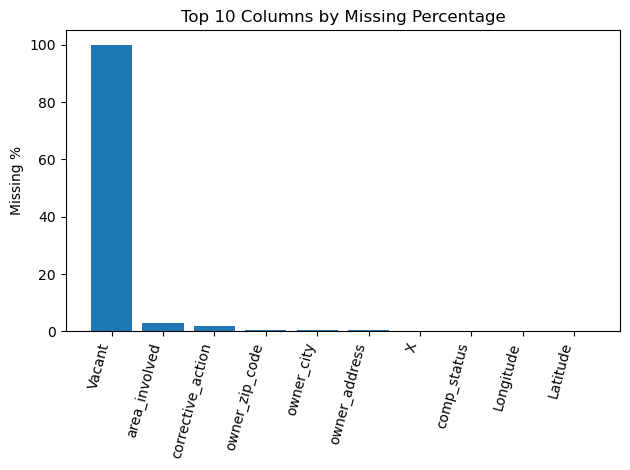

In [26]:
import matplotlib.pyplot as plt

top_missing = missing_summary.head(10)

plt.figure()
plt.bar(top_missing.index.astype(str), top_missing["missing_pct"])
plt.xticks(rotation=75, ha="right")
plt.ylabel("Missing %")
plt.title("Top 10 Columns by Missing Percentage")
plt.tight_layout()
plt.show()


In [27]:
cat_cols = [
    c for c in text_cols
    if 2 <= df_clean[c].nunique(dropna=True) <= 25
]

cat_cols


['violation',
 'status_type_name',
 'department_name',
 'complaint_type_name',
 'comp_close_date',
 'article',
 'owner_state']

C:\Users\abhis\AppData\Local\Temp\ipykernel_24772\1542820969.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


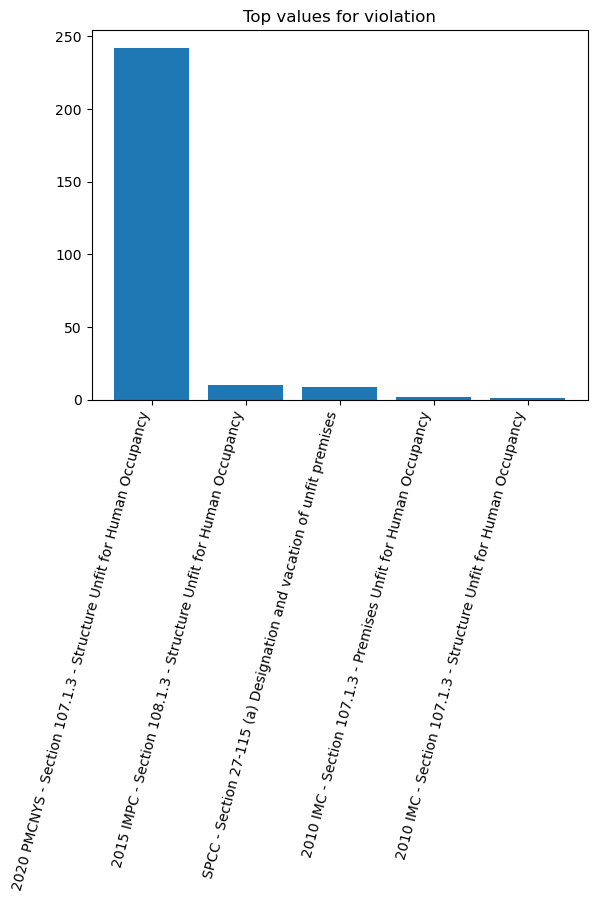

In [28]:
if cat_cols:
    col = cat_cols[0]
    vc = df_clean[col].value_counts(dropna=False).head(10)

    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.xticks(rotation=75, ha="right")
    plt.title(f"Top values for {col}")
    plt.tight_layout()
    plt.show()


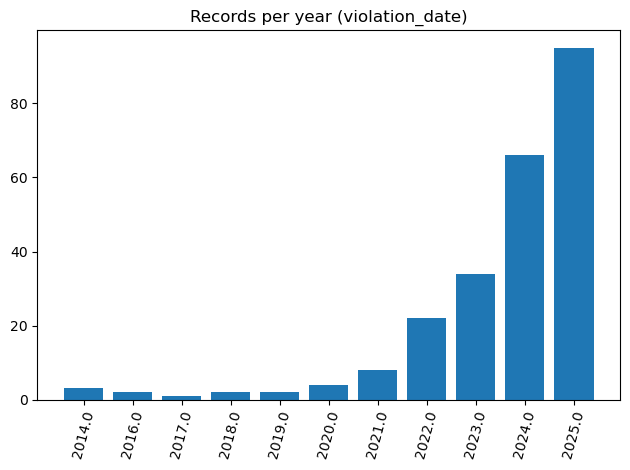

In [29]:
for col in date_cols:
    parsed = pd.to_datetime(df_clean[col], errors="coerce")
    if parsed.notna().sum() > 0:
        counts = parsed.dt.year.value_counts().sort_index()
        plt.figure()
        plt.bar(counts.index.astype(str), counts.values)
        plt.xticks(rotation=75)
        plt.title(f"Records per year ({col})")
        plt.tight_layout()
        plt.show()
        break


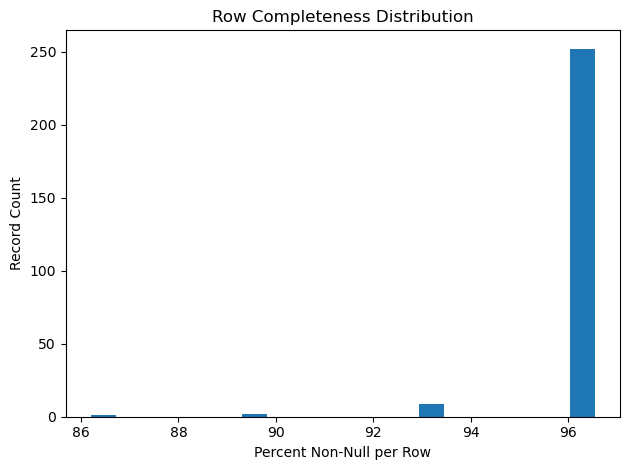

In [31]:
row_completeness = df_clean.notna().mean(axis=1) * 100

plt.figure()
plt.hist(row_completeness, bins=20)
plt.xlabel("Percent Non-Null per Row")
plt.ylabel("Record Count")
plt.title("Row Completeness Distribution")
plt.tight_layout()
plt.show()


In [32]:
ground_truth = {
    "total_records": int(len(df_clean)),
    "most_missing_column": missing_summary.index[0],
    "most_missing_pct": float(missing_summary.iloc[0]["missing_pct"]),
}

ground_truth


{'total_records': 264,
 'most_missing_column': 'Vacant',
 'most_missing_pct': 100.0}

In [33]:
import json

gt_path = OUTPUT_DIR / "ground_truth_findings.json"
gt_path.write_text(json.dumps(ground_truth, indent=2))
gt_path


WindowsPath('/mnt/data/syracuse_unfit_properties_project/outputs/ground_truth_findings.json')

You are analyzing Syracuse “Unfit Properties” open data.

Use ONLY the following ground-truth statistics:
- total_records: <value>
- most_missing_column: <column>
- most_missing_pct: <value>

Tasks:
1. Propose 3 hypotheses about spatial or temporal patterns in unfit properties.
2. For each hypothesis, describe what calculation or visualization would confirm it.
3. Identify 2 potential biases in this dataset and how to mitigate them in reporting.

Do NOT invent numbers.
